In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", 40)
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('hypothyroid.csv')

In [17]:
df.shape

(3772, 30)

In [18]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

# EDA

1. Check Missing Values
2. Check for Imabalanced Dataset
3. Check distribution of numerical data
4. Check relationship b/w categorical data and target feature
5. Check for cardinality of categorical features
6. Check for Outliers

### 1. Check for missing values

In [20]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [21]:
# Let's find the missing values with '?'
        
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


#### Observation


- The missing values shows as 0 while checking with the function however the missing values are represented with '?'.

- Detected the missing values by counting number of '?' in every columns

In [11]:
# Dropping TBG feature as all the rows have missing values 

df = df.drop(['TBG'],axis =1)

**Some feature columns with true and false value are just the indication whether the next column has values or not. Let's see an example:**

In [12]:
df[['T4U_measured','T4U']].head(5)

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87


**Since, one column indicates whether the measurement was recorded or not and the other col has the recorded mesurement values. Therefore, dropping all measured cols which only has boolean features as both the columns are related and it doesn't contribute to prediction.**

In [13]:
df = df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'])

In [14]:
df.shape

(3772, 23)

In [15]:
# Replacing the '?' values with numpy nan

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)    

In [16]:
# Verifying if '?' is still there in any of the columns

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, df[column][df[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [17]:
df.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [18]:
# Names of missing values

missing_values = [features for features in df.columns if df[features].isnull().sum()]
missing_values

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [19]:
# Finding % of missing values

for i in missing_values:
    null_percentage = np.round((df[i].isnull().sum()/df.shape[0])*100, 4) # Rounding off value to 4 decimal place
    print(f"{i}: {null_percentage} % of missing values")

age: 0.0265 % of missing values
sex: 3.9767 % of missing values
TSH: 9.7826 % of missing values
T3: 20.3871 % of missing values
TT4: 6.1241 % of missing values
T4U: 10.2598 % of missing values
FTI: 10.2068 % of missing values


### Observation

- After replacing the '?' values with nan, we now have the names, count and the percentage of missing values.

### Data Summary

In [20]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
count,3771,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3403,3003,3541,3385,3387,3772,3772
unique,93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,287,69,241,146,234,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.2,2,101,0.99,100,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,116,238,71,95,73,2201,3481


In [21]:


# Using describe funcion on categorical data 

df[df.columns[df.dtypes=='O']].describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
count,3771,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3403,3003,3541,3385,3387,3772,3772
unique,93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,287,69,241,146,234,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.2,2,101,0.99,100,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,116,238,71,95,73,2201,3481


In [22]:
# The numerical features too are of object type which should be converted to integer type

numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [23]:
# Converting numerical cols to type float

for features in df[numerical_features]:
    df[features] = df[features].astype(float)

In [24]:
df[numerical_features].head()

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.30,2.5,125.0,1.14,109.0
1,23.0,4.10,2.0,102.0,NaN,NaN
2,46.0,0.98,NaN,109.0,0.91,120.0
3,70.0,0.16,1.9,175.0,NaN,NaN
4,70.0,0.72,1.2,61.0,0.87,70.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
age                          3771 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH                          3403 non-null float64
T3                           3003 non-nul

#### Type conversion successful

### 2. Checking if target variable is imabalanced

In [26]:
df['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

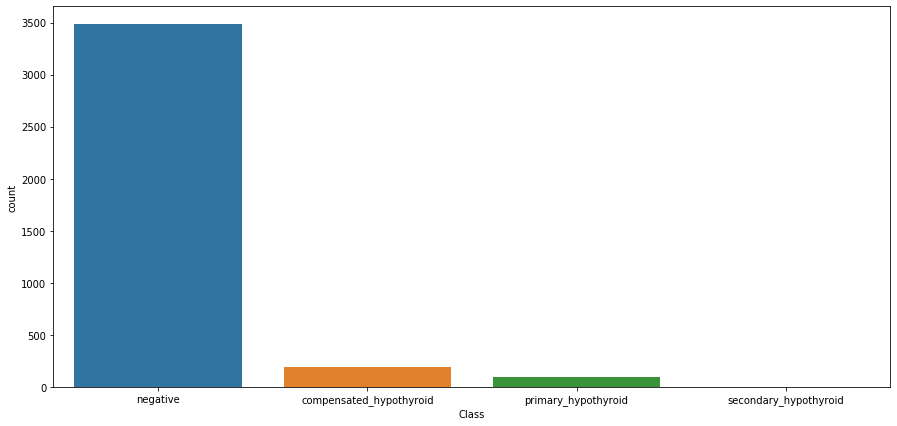

In [27]:
plt.figure(figsize=(15,7))

sns.countplot(x=df['Class'])

#### Observation:

- We can see that the target feature is imabalanced.

### 3. Checking distribution of numerical data

In [28]:
# Checking if numerical features have 0 value in it

numerical_no_zero=[features for features in numerical_features if 0 not in df[features].unique()]
numerical_no_zero


['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

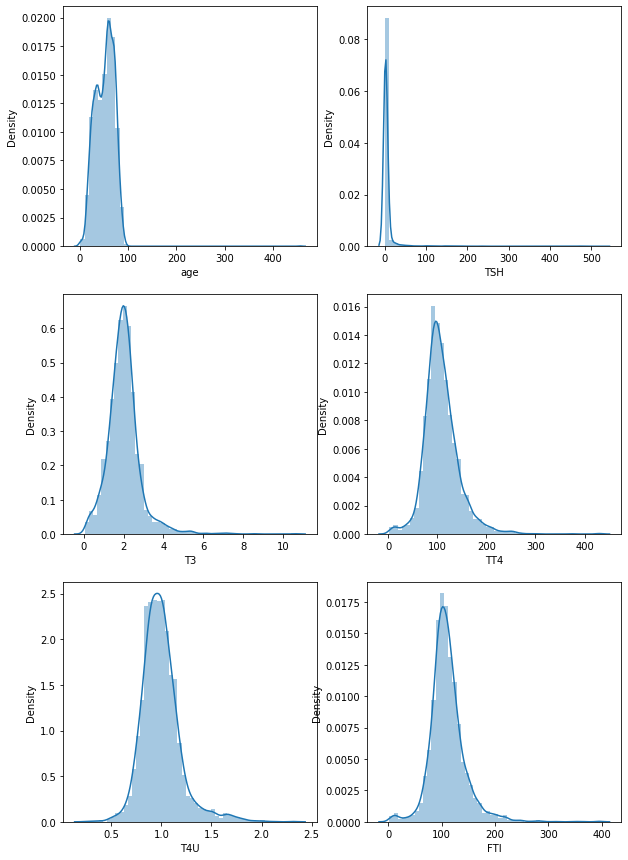

In [29]:
# Checking the distribution of numerical features

plt.figure(figsize=(10,15),facecolor='white')

plot_number = 1

for features in numerical_features:
    plt.subplot(3,2,plot_number)
    sns.distplot(x=df[features])
    plt.xlabel(features)
    plot_number+=1
plt.show()

#### Observation:

- The numerical data looks normally distributed except for TSH. And none of the numerical data has 0 value in it.

### 4. Checking relationship b/w categorical data and target feature

In [30]:
# List comprehension to get the name of categorical data

categorical_data = [features for features in df.columns if df[features].dtype == 'O']
categorical_data

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source',
 'Class']

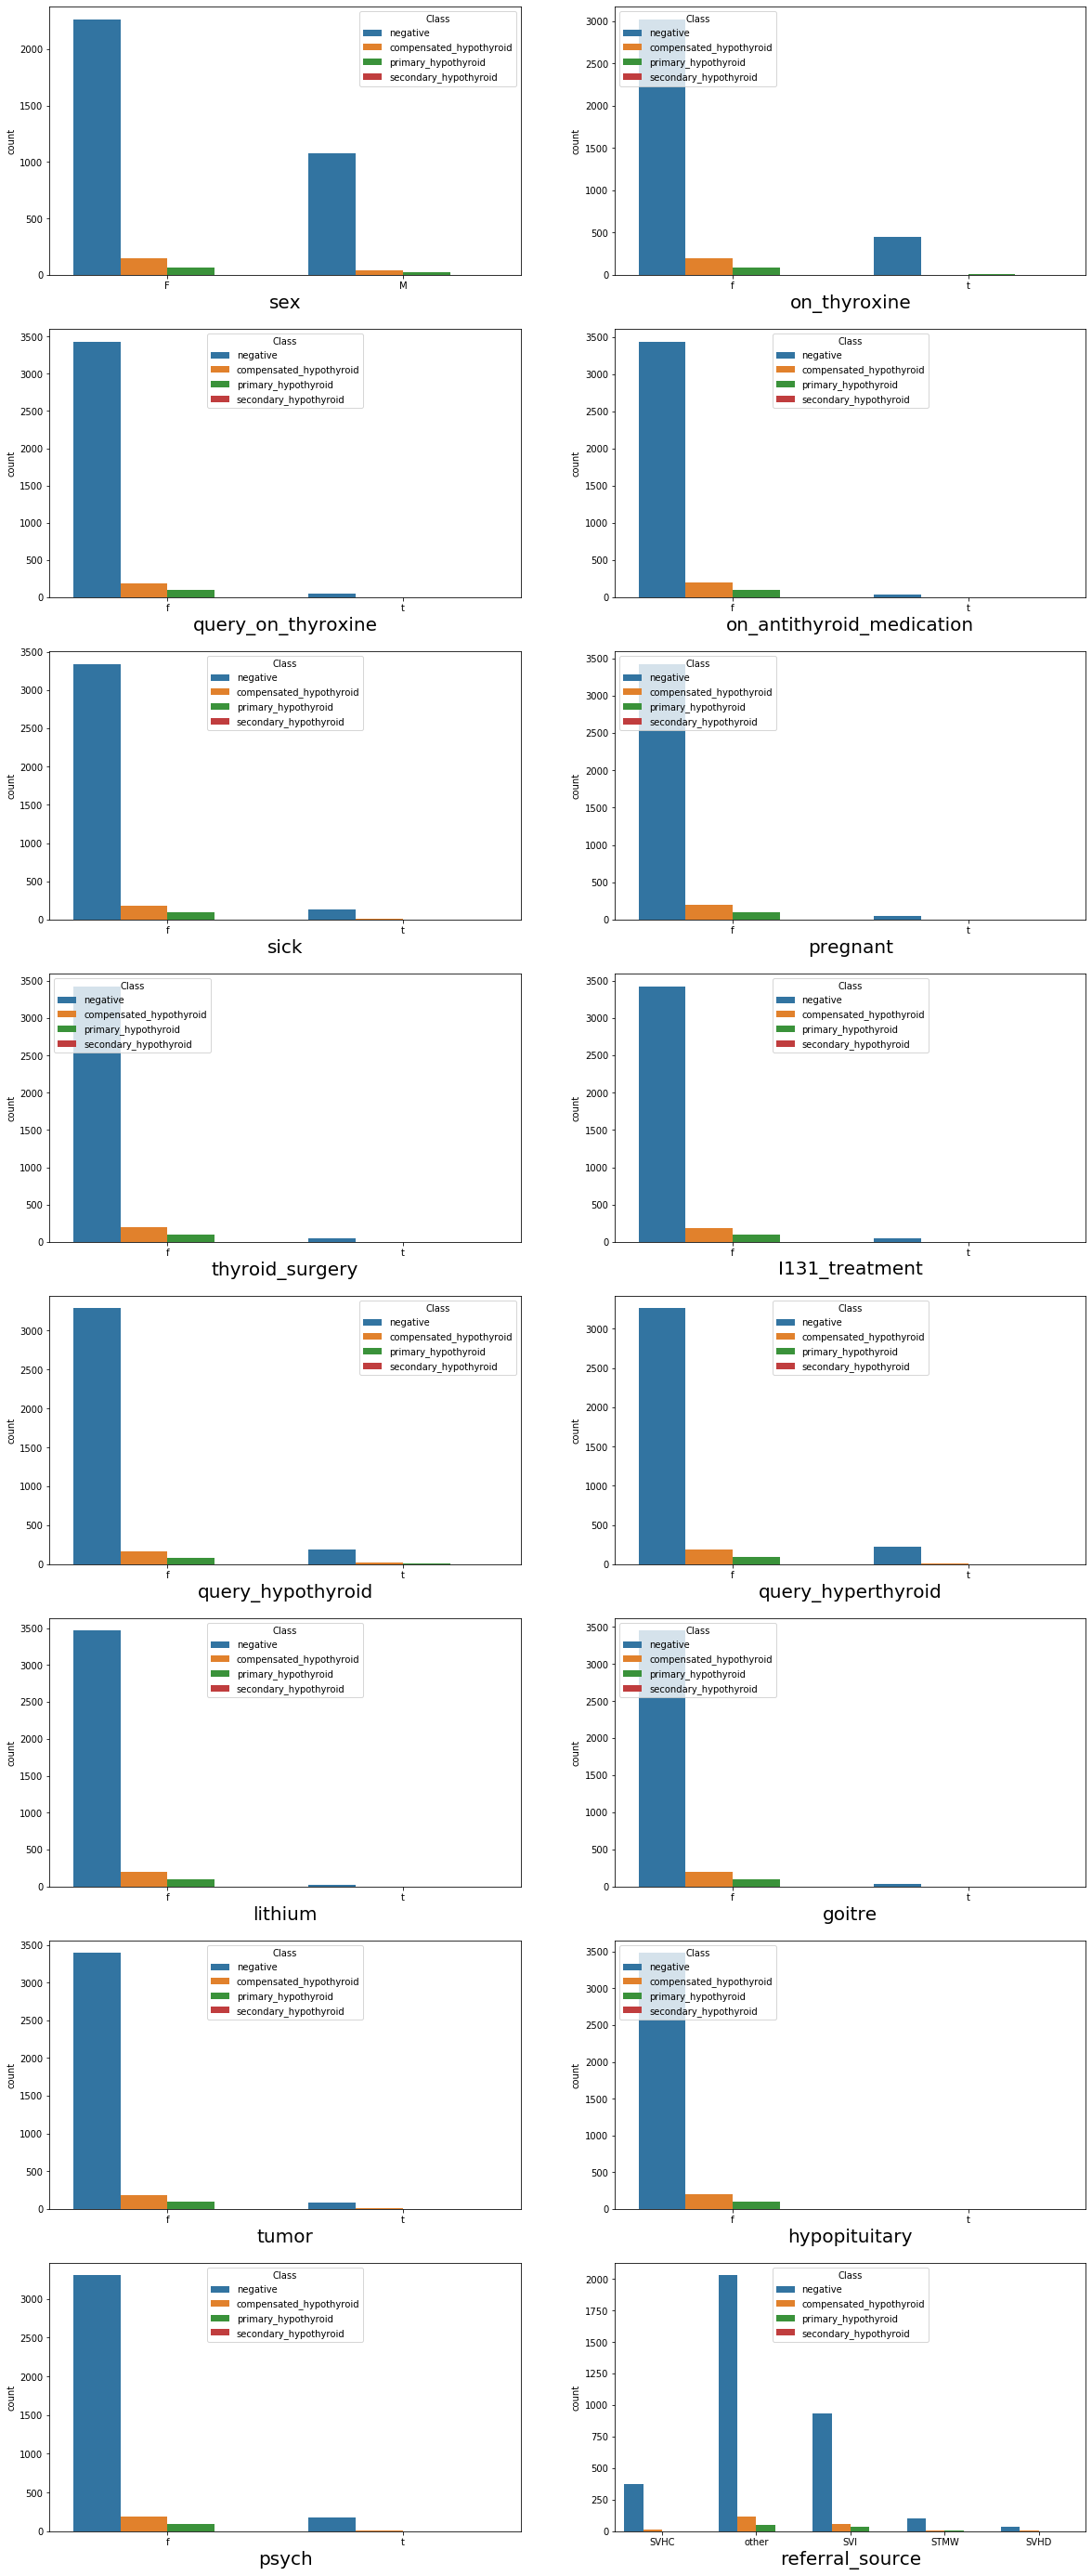

In [31]:
# Let us visualize indenpdent features w.r.t. dependent features using countplot

plt.figure(figsize=(20,50))
plot_number=1


for features in df[categorical_data].drop(columns=['Class']):
    if plot_number <= 16:
        plt.subplot(8,2,plot_number)
        sns.countplot(x=df[features], hue=df['Class'])
        plt.xlabel(features, fontsize=20)
    plot_number+=1
plt.show()



### Observation:

- We can conclude that most of the people do not have thyroid and the ones who are diagnosed with thyroid either have compensated_hypothyroid or primary_hypothyroid.

### 5. Checking for cardinality of categorical features

In [32]:
for features in categorical_data:
    print(df[features].value_counts())

F    2480
M    1142
Name: sex, dtype: int64
f    3308
t     464
Name: on_thyroxine, dtype: int64
f    3722
t      50
Name: query_on_thyroxine, dtype: int64
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid_surgery, dtype: int64
f    3713
t      59
Name: I131_treatment, dtype: int64
f    3538
t     234
Name: query_hypothyroid, dtype: int64
f    3535
t     237
Name: query_hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3771
t       1
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral_source, dtype: int64
negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hyp

### Observation:

- All the categorical features have two categories except for 'referral_soruce'.

### 6. Checking for Outliers

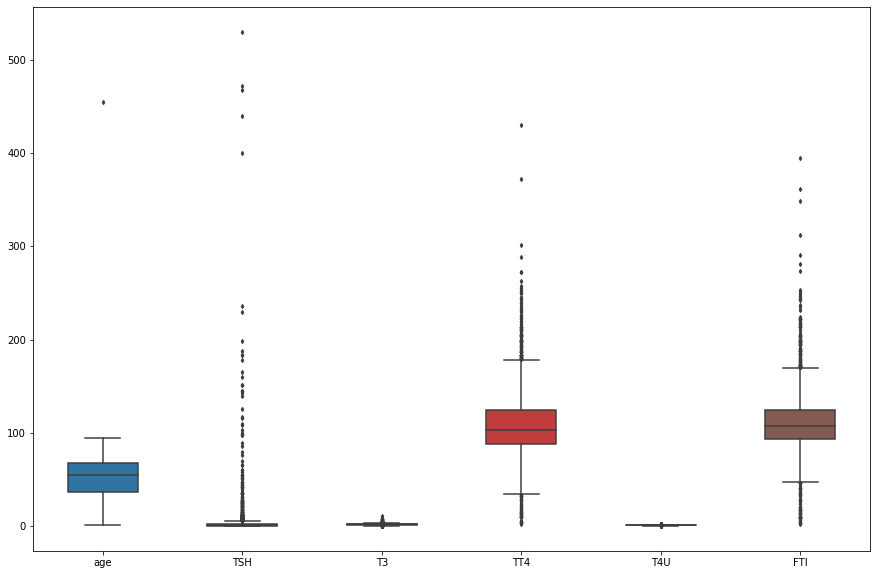

In [33]:
# Checking for Outliers

fig, ax = plt.subplots(figsize=(15,10))  #sns.boxplot(data=df)
sns.boxplot(data=df[numerical_features].dropna(), width= 0.5,ax=ax,  fliersize=3)

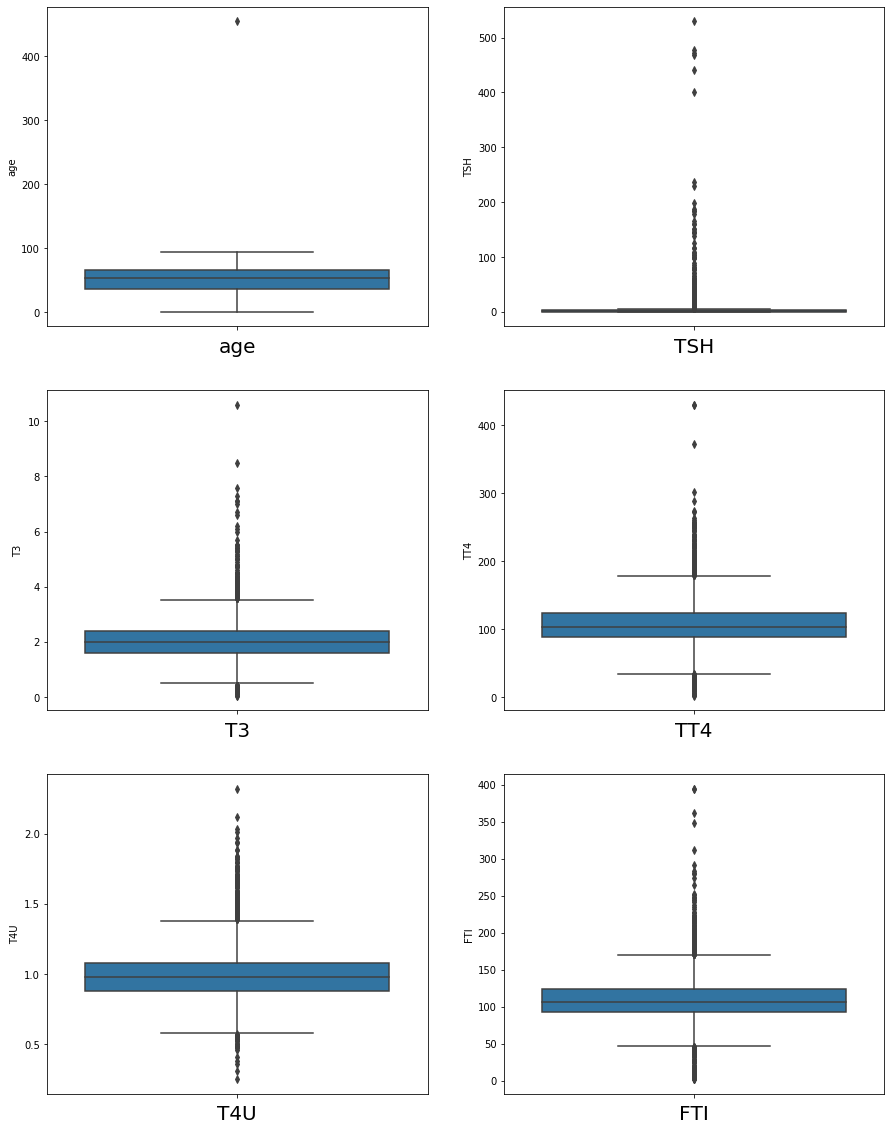

In [34]:
# Let us visualize outliers 

plt.figure(figsize=(15,20))
plot_number=1


for features in df[numerical_features]:
    if plot_number <= 16:
        plt.subplot(3,2,plot_number)
        sns.boxplot(y=df[features].dropna(), hue=df['Class'])
        plt.xlabel(features, fontsize=20)
    plot_number+=1
plt.show()

In [35]:
# As we can see that age has one outlier which must have been an error as people don't age 455 years.

df[df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
1364,455.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.1,2.0,118.0,1.13,104.0,SVI,negative


### Observation:

- We can see that all the features except age have massive Outliers.

### Let us check which average age group has thyroid

In [36]:
df.groupby('Class')['age'].mean()

Class
compensated_hypothyroid    52.293814
negative                   51.754310
primary_hypothyroid        50.094737
secondary_hypothyroid      43.500000
Name: age, dtype: float64

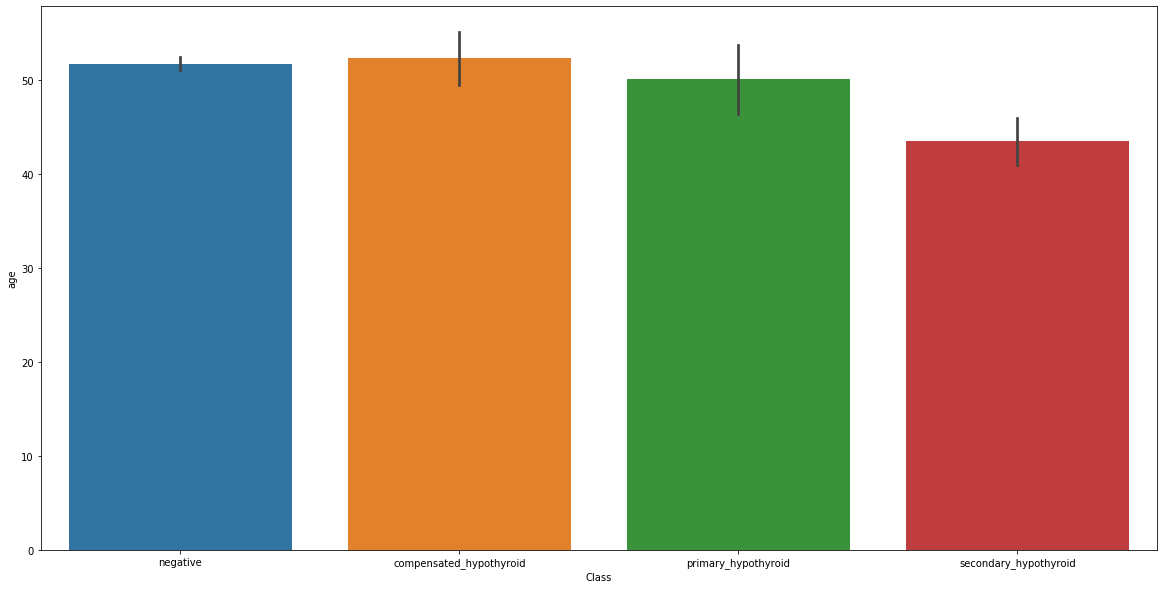

In [37]:
plt.figure(figsize=(20,10))

sns.barplot(x=df['Class'], y=df['age'])

### We can observe that people of average age 42 and beyond usually gets  diagnosed with thyroid as compared to young people

In [38]:
# Checking how many males and females are undergoing medication and treatment for thyroid

df.groupby(['sex', 'pregnant', 'on_thyroxine', 'on_antithyroid_medication', 'I131_treatment']).size().reset_index()

,sex,pregnant,on_thyroxine,on_antithyroid_medication,I131_treatment,0
0,F,f,f,f,f,2013
1,F,f,f,f,t,33
2,F,f,f,t,f,28
3,F,f,t,f,f,343
4,F,f,t,f,t,9
5,F,f,t,t,f,3
6,F,t,f,f,f,39
7,F,t,f,t,f,4
8,F,t,t,f,f,8
9,M,f,f,f,f,1044


### Observation:

- From the above df, we can conclude that pregnant women do take thyroxine medicine and anti-thyroid medication however they do not receive I131_treatment. Whereas women who aren't pregnant and men undergo all three types of medication.

In [39]:
# Checking how many males and females are have 'goitre','tumor','hypopituitary','psych' issues


df.groupby(['sex', 'goitre','tumor','hypopituitary','psych']).size().reset_index()

,sex,goitre,tumor,hypopituitary,psych,0
0,F,f,f,f,f,2291
1,F,f,f,f,t,83
2,F,f,t,f,f,82
3,F,f,t,f,t,2
4,F,t,f,f,f,20
5,F,t,f,f,t,1
6,F,t,t,f,f,1
7,M,f,f,f,f,1027
8,M,f,f,f,t,93
9,M,f,f,t,f,1


### Observation:

- From the above df, we can conclude that men and women do have thyroid pyshocsis issues. And women have tumor issues too.

In [40]:
### Checking how many males and females underwent thyroid surgery

df.groupby(['sex', 'sick', 'pregnant','thyroid_surgery']).size().reset_index()

,sex,sick,pregnant,thyroid_surgery,0
0,F,f,f,f,2292
1,F,f,f,t,41
2,F,f,t,f,51
3,F,t,f,f,94
4,F,t,f,t,2
5,M,f,f,f,1086
6,M,f,f,t,9
7,M,t,f,f,47


### Observartion:

- From the above data we see that sick women could undergo thyroid surgery however pregnant women did not undego thyroid surgery

# FEATURE ENGINEERING

1. Convert Categorical features to numerical features
2. Handle Missing Values
3. Check Skewed data

### 1. Convert Categorical features to numerical features

- Since the values are categorical, we have to change them to numerical before we use any imputation techniques.
For the columns which have only two distinct categories, values can be replaced using mapping instead of pd.get_dummies however it performs the same task as we have to drop one of the categories while using OneHotEncoding to avoid dummy variable trap.

In [41]:
# Converting sex col to numerical type where female is 0 and male is 1

dict1 = {
    'F': 0,
    'M': 1
}

df['sex'] = df['sex'].map(dict1)

In [42]:
# Using loop to find all columns with binary categories 't' and 'f' to convert them to numerical type

for column in df.columns:
    if  len(df[column].unique())== 2:
        df[column] = df[column].map({'f': 0, 't': 1})
    


In [43]:
# The referral_source has only 5 categories hence we can use OneHotEncoding 

df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [44]:
# we will use get_dummies on referral_source col

df = pd.get_dummies(df, columns=['referral_source'], drop_first=True)

In [45]:
# Since the target feature is also categorical, we need to convert that to numerical variable using LabelEncoder

df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [46]:
le = LabelEncoder()

df['Class'] =le.fit_transform(df['Class'])

In [47]:
# 0: compensated_hypothyroid, 1: negative, 2: primary_hypothyroid, 3: secondary_hypothyroid

df['Class'].value_counts()

1    3481
0     194
2      95
3       2
Name: Class, dtype: int64

In [48]:
df.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,5.086766,2.013500,108.319345,0.995000,110.469649,0.974814,0.102333,0.010339,0.274125,0.583510
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,0.068924,0.094525,0.157510,0.016282,0.215437,24.521470,0.827434,35.604248,0.195457,33.089698,0.279508,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.600000,88.000000,0.880000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,2.000000,103.000000,0.980000,107.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,2.400000,124.000000,1.080000,124.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.320000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**All the columns have been converted to numerical features**

In [49]:
df.shape

(3772, 26)

### 2. Handle Missing Values

In [50]:
df[missing_values].isna().sum()

age      1
sex    150
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

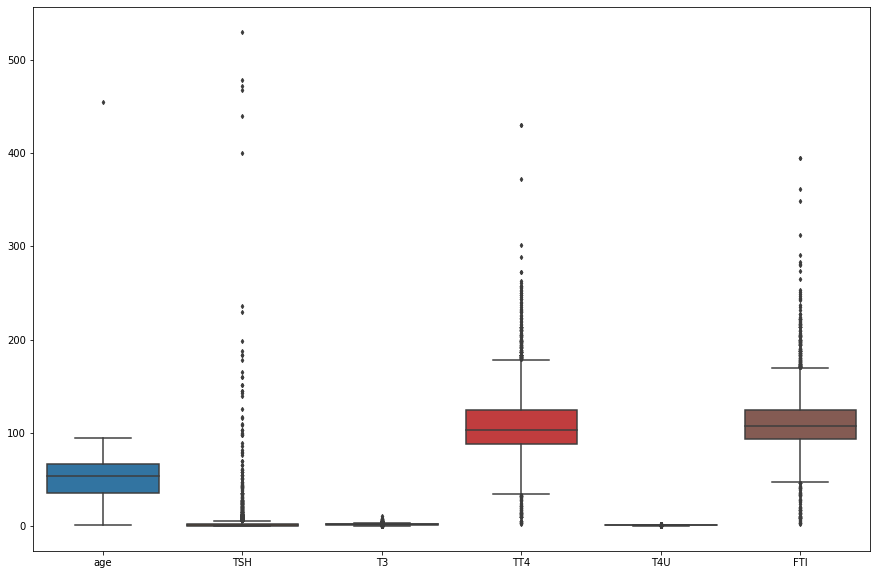

In [51]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df[numerical_features], fliersize=3)

In [52]:
# Using KNN Imputer to impute missing values as there are many outliers in the data 

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
data=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [53]:
data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

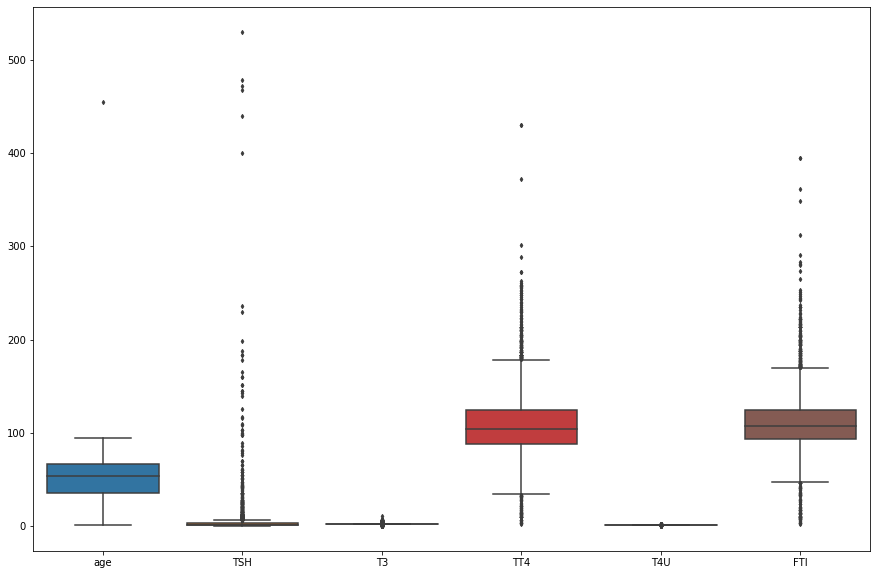

In [54]:
plt.figure(figsize=(15,10))

sns.boxplot(data=data[numerical_features], fliersize=3)

In [55]:
missing_values

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [56]:
# Imputing missing values with median as well to check which imputation technique causes Change or Distortion 
# in the original variance and standard deviation  there are Outliers in the cols where the values are missing 

for values in missing_values:
    df[values+"mean"] = df[values].fillna(df[values].median())

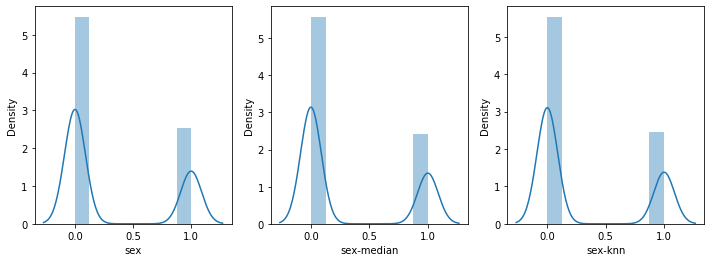

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('sex')
sns.distplot(x=df['sex'])
plt.subplot(1,3,2)
plt.xlabel('sex-median')
sns.distplot(x=df['sexmean'])
plt.subplot(1,3,3)
plt.xlabel('sex-knn')
sns.distplot(x=data['sex'])

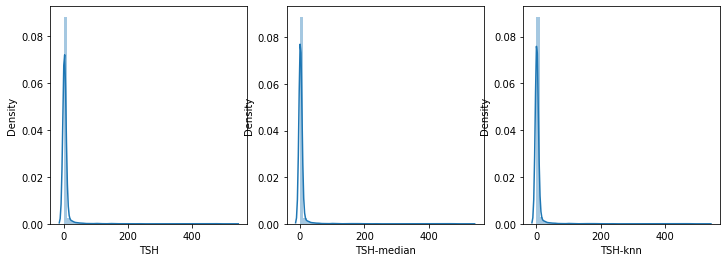

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('TSH')
sns.distplot(x=df['TSH'])
plt.subplot(1,3,2)
plt.xlabel('TSH-median')
sns.distplot(x=df['TSHmean'])
plt.subplot(1,3,3)
plt.xlabel('TSH-knn')
sns.distplot(x=data['TSH'])

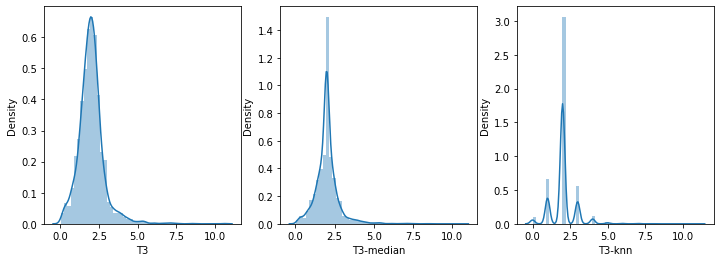

In [59]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('T3')
sns.distplot(x=df['T3'])
plt.subplot(1,3,2)
plt.xlabel('T3-median')
sns.distplot(x=df['T3mean'])
plt.subplot(1,3,3)
plt.xlabel('T3-knn')
sns.distplot(x=data['T3'])

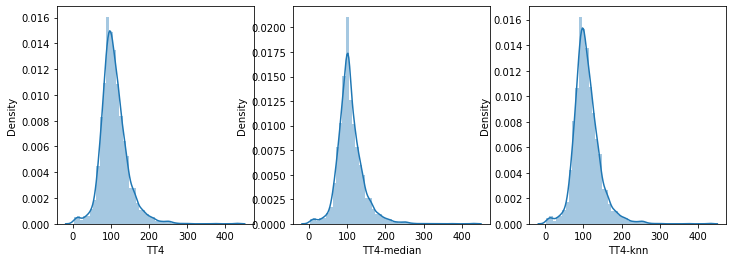

In [60]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('TT4')
sns.distplot(x=df['TT4'])
plt.subplot(1,3,2)
plt.xlabel('TT4-median')
sns.distplot(x=df['TT4mean'])
plt.subplot(1,3,3)
plt.xlabel('TT4-knn')
sns.distplot(x=data['TT4'])

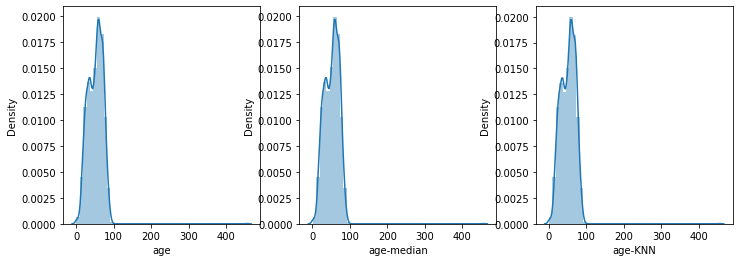

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('age')
sns.distplot(x=df['age'])
plt.subplot(1,3,2)
plt.xlabel('age-median')
sns.distplot(x=df['agemean'])
plt.subplot(1,3,3)
plt.xlabel('age-KNN')
sns.distplot(x=data['age'])

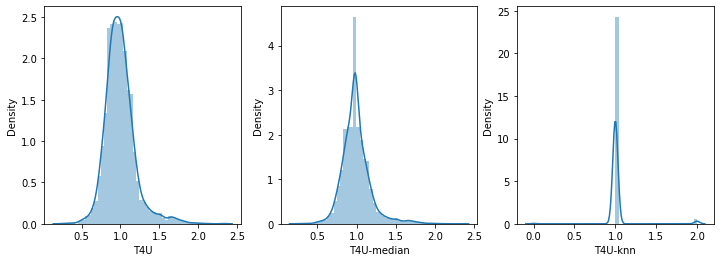

In [62]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('T4U')
sns.distplot(x=df['T4U'])
plt.subplot(1,3,2)
plt.xlabel('T4U-median')
sns.distplot(x=df['T4Umean'])
plt.subplot(1,3,3)
plt.xlabel('T4U-knn')
sns.distplot(x=data['T4U'])

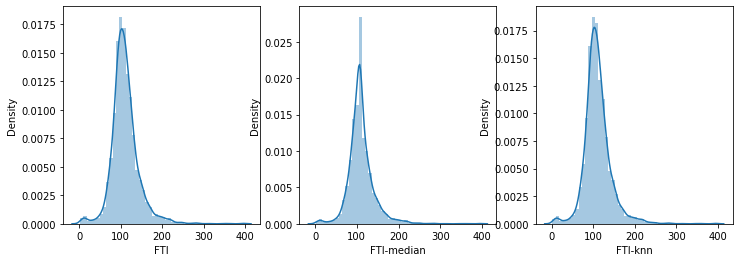

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel('FTI')
sns.distplot(x=df['FTI'])
plt.subplot(1,3,2)
plt.xlabel('FTI-median')
sns.distplot(x=df['FTImean'])
plt.subplot(1,3,3)
plt.xlabel('FTI-knn')
sns.distplot(x=data['FTI'])

#### Obsevation:

- Change or Distortion in the original variance and standard deviation is less with median imputation on T4U and T3 cols. For rest of the cols the values will be imputed using KNNImputer however for cols: T4U and T3, values will be imputed using median imputation. Since there are outliers, mean imputation shall not be used.

#### Using KNN Imputer to impute missing values on 'age', 'sex', 'TSH', 'TT4', 'FTI' cols only


In [64]:
imputer = KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array = imputer.fit_transform(df[['age', 'sex', 'TSH', 'TT4', 'FTI']]) 

new_array_df = pd.DataFrame(data=np.round(new_array), columns= ['age', 'sex', 'TSH', 'TT4', 'FTI'])

In [65]:
new_array_df

,age,sex,TSH,TT4,FTI
0,41.0,0.0,1.0,125.0,109.0
1,23.0,0.0,4.0,102.0,108.0
2,46.0,1.0,1.0,109.0,120.0
3,70.0,0.0,0.0,175.0,177.0
4,70.0,0.0,1.0,61.0,70.0
...,...,...,...,...,...
3767,30.0,0.0,3.0,120.0,122.0
3768,68.0,0.0,1.0,124.0,114.0
3769,74.0,0.0,5.0,112.0,105.0
3770,72.0,1.0,1.0,82.0,87.0


#### Using median imputation to impute missing values on  T4U and T3 cols.

In [66]:
cols = ['T4U', 'T3']

In [67]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [68]:
df[['T4U', 'T3']].isnull().sum()

T4U    0
T3     0
dtype: int64

#### The missing values have been replaced by median value in T4U and T3 cols. We can drop some of the unncessary cols which was added earlier from original df and thereafter, the new_array_df  and original df can be concatenated to create new df

In [69]:
# Dropping 'age', 'sex', 'TSH', 'TT4', 'FTI' cols as the new_array_df includes these cols without missing values

df.drop(columns=['age', 'sex', 'TSH', 'TT4', 'FTI', 'agemean', 'sexmean', 'TSHmean', 'T3mean', 'TT4mean', 'T4Umean', 'FTImean'], inplace=True)

In [70]:
dataset = pd.concat([df, new_array_df], axis=1)

In [71]:
dataset.shape

(3772, 26)

In [72]:
dataset.isnull().sum()

on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3                           0
T4U                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
age                          0
sex                          0
TSH                          0
TT4                          0
FTI                          0
dtype: int64

**New dataframe with no missing values which were imputed using KNNImputer and median imputation.**

In [73]:
# Age has one extreme outlier of 455 in one of the rows which shall be dropped

dataset[dataset['age']>100]

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,T4U,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,age,sex,TSH,TT4,FTI
1364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.13,1,0,0,1,0,455.0,0.0,1.0,118.0,104.0


In [74]:
# Dropping row no. 1364

dataset.drop(index=1364, inplace=True)

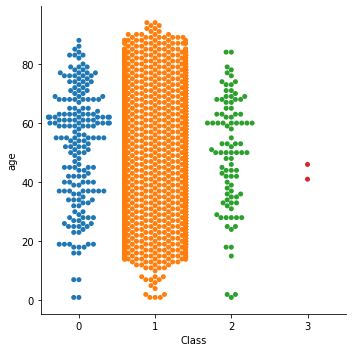

In [75]:
# Checking which age group have been diagnose with different types of thyorid

sns.catplot(x="Class", y="age", data=dataset, kind='swarm')

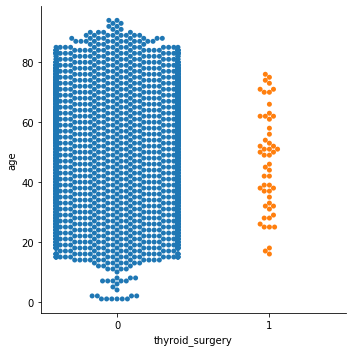

In [76]:
# Checking which age group have undegone thyroid_surgery 

sns.catplot(x="thyroid_surgery", y="age", data=dataset, kind='swarm')

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 26 columns):
on_thyroxine                 3771 non-null int64
query_on_thyroxine           3771 non-null int64
on_antithyroid_medication    3771 non-null int64
sick                         3771 non-null int64
pregnant                     3771 non-null int64
thyroid_surgery              3771 non-null int64
I131_treatment               3771 non-null int64
query_hypothyroid            3771 non-null int64
query_hyperthyroid           3771 non-null int64
lithium                      3771 non-null int64
goitre                       3771 non-null int64
tumor                        3771 non-null int64
hypopituitary                3771 non-null int64
psych                        3771 non-null int64
T3                           3771 non-null float64
T4U                          3771 non-null float64
Class                        3771 non-null int64
referral_source_SVHC         3771 non-null uint8
referra

#### Observation:

- After removing the Outlier in age, it is clearly visitble that even children of below 10 have been diagnosed with thyroid. But the most likely age to be diagnosed seems to be after the age of 20.

- The second plot also shows that people of age 16 and above have only undergone thyroid_surgery.

### 3. Check Skewed Data

- Skewness will not be treated as Tree based algorithms have no assumptions

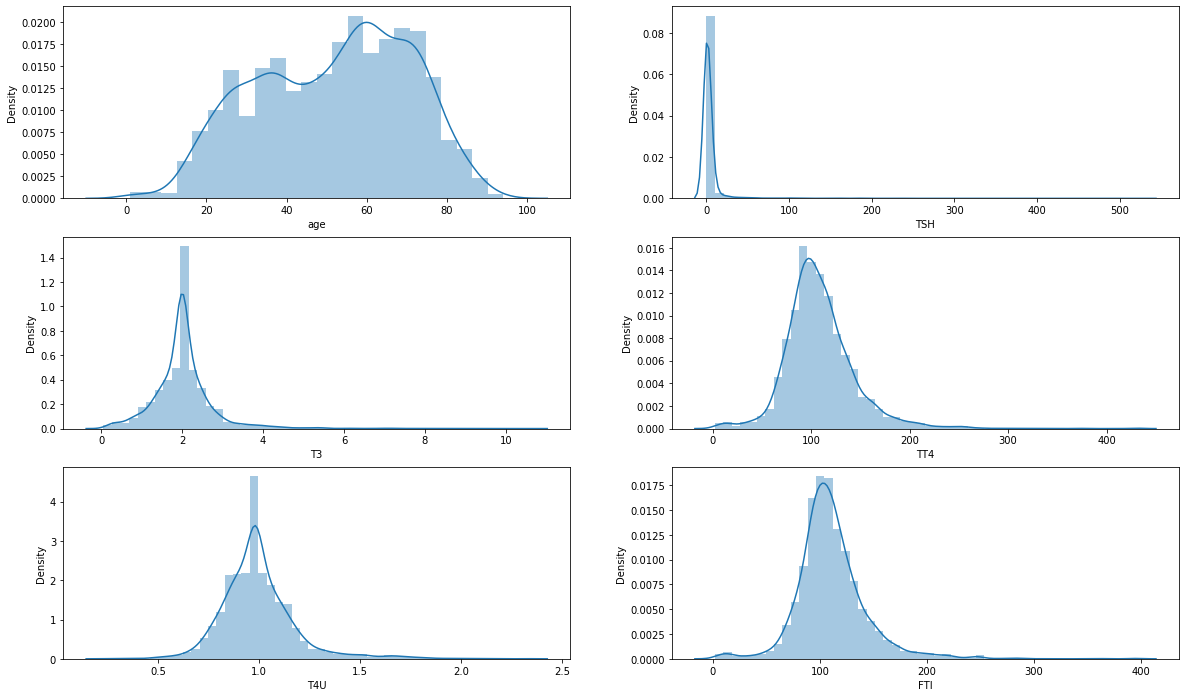

In [77]:
plt.figure(figsize=(20,12))
plot_number = 1

for features in dataset[numerical_features]:
    plt.subplot(3,2,plot_number)
    sns.distplot(x=dataset[features])
    plt.xlabel(features)
    plot_number += 1
plt.show()

In [78]:
# Writing a function to check for skewness and GD 

import scipy.stats as stat
import pylab 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    # plot histogram first
    plt.subplot(1,2,1)
    df[feature].plot.hist(bins=30)
    #  next, plot qqplot 
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

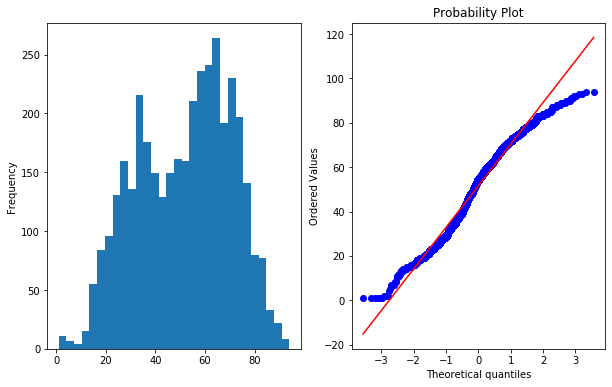

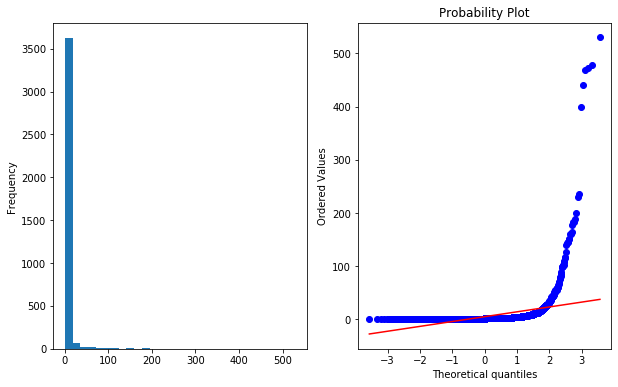

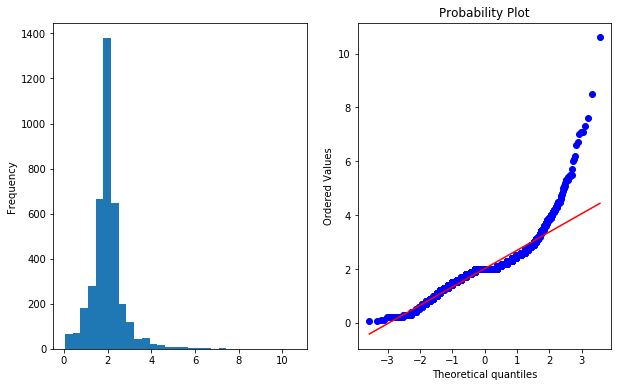

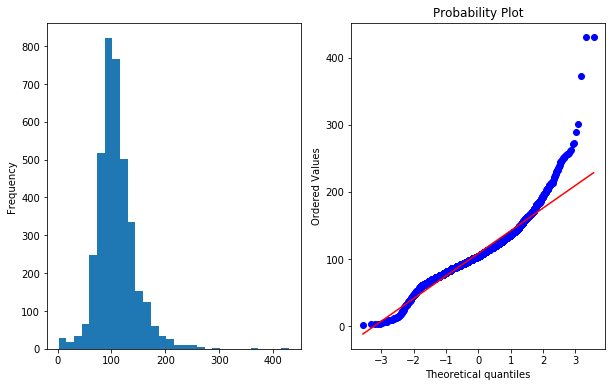

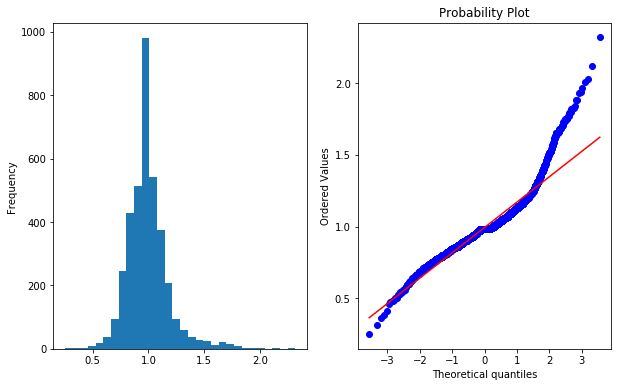

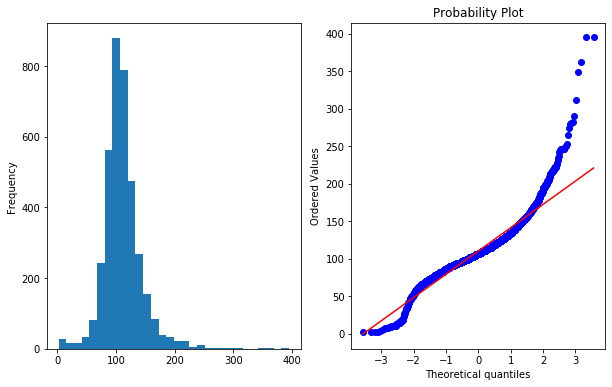

In [79]:
# Checking skewness for all of the numerical data

for features in numerical_features:
    plot_data(dataset, features)

# FEATURE SELECTION


### 1. Checking Correlation

In [129]:
# Separating features and label cols

X = dataset.drop(columns='Class')
y = dataset['Class']

## Performing train_test_split before checking for correlation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=None)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2828, 25), (943, 25), (2828,), (943,))

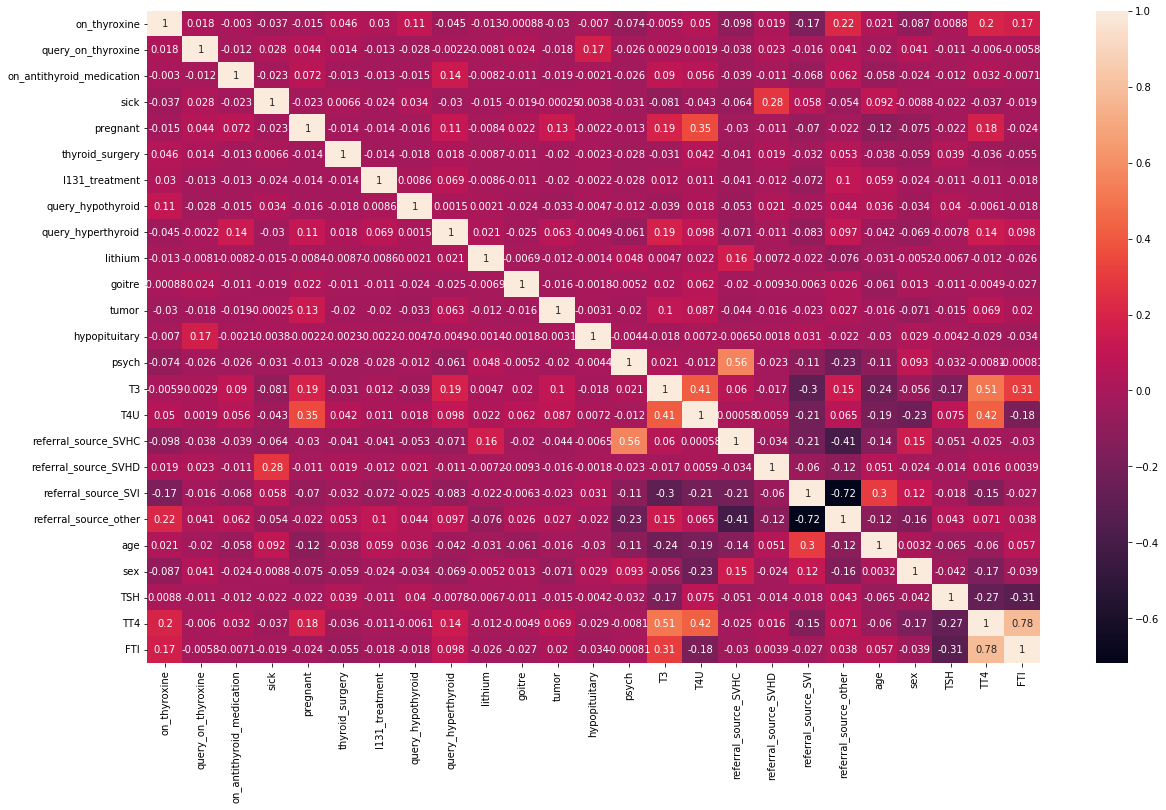

In [131]:
# Let us check the correlation

plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(), annot=True)

#### TT4 AND FTI have slightly high correlation.

In [83]:
# Writing a function so we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [84]:
# There are no features with correlation higher than 0.8

correlation(dataset, 0.8)

set()

### 2. Checking VIF

In [85]:
# Scaling the X_train data to check the VIF score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_train_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, adding col with features names
vif["FEATURES"] = X.columns

In [87]:
vif

,VIF,FEATURES
0,1.141388,on_thyroxine
1,1.011269,query_on_thyroxine
2,1.032075,on_antithyroid_medication
3,1.139510,sick
4,1.201689,pregnant
5,1.013868,thyroid_surgery
6,1.027114,I131_treatment
7,1.021824,query_hypothyroid
8,1.089927,query_hyperthyroid
9,1.038298,lithium


In [88]:
# Getting the name of columns with VIF score more than 10

vif[vif['VIF'] > 10]

,VIF,FEATURES
23,18.831139,TT4
24,15.812475,FTI


### 3. Checking which features are highly correlated with labels using mutual_info_classif

In [89]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([8.75039995e-03, 1.19864174e-03, 2.69513389e-03, 0.00000000e+00,
       2.86565733e-03, 4.25770451e-04, 0.00000000e+00, 2.24918715e-04,
       2.07389272e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93205296e-03, 2.32274954e-03, 3.32165268e-02, 3.40341294e-03,
       0.00000000e+00, 3.81062273e-03, 4.41261177e-03, 1.66590624e-04,
       6.82290095e-03, 3.66275616e-03, 2.13538106e-01, 8.89039657e-02,
       1.03879050e-01])

In [90]:
info_df = pd.DataFrame(mutual_info)
info_df.index = X_train.columns

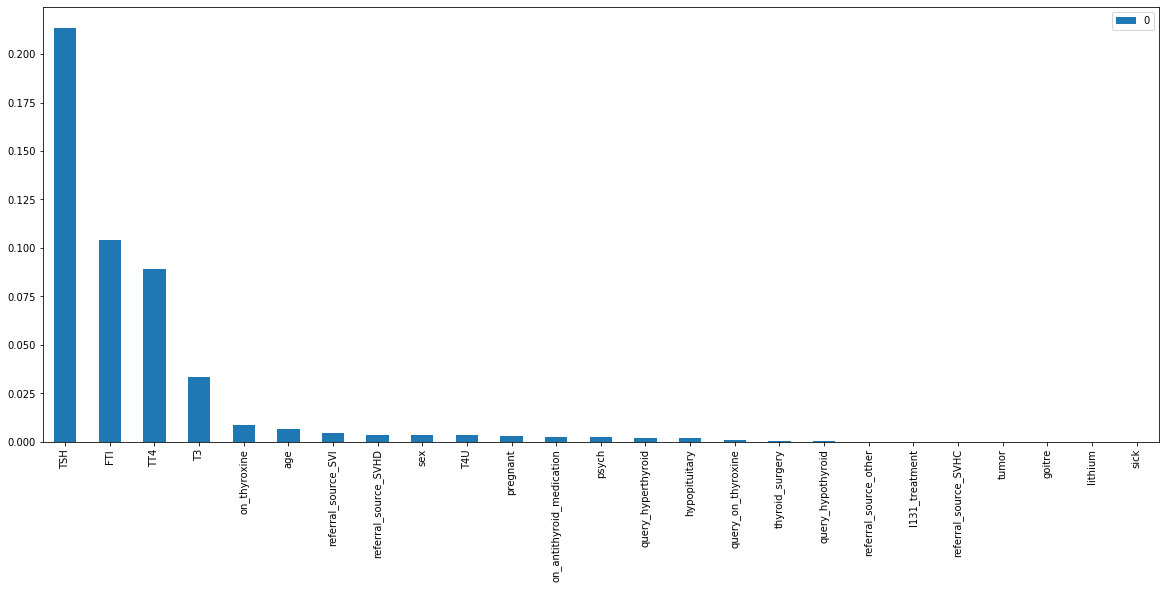

In [91]:
info_df.sort_values(by=0,ascending=False).plot.bar(figsize=(20,8))

### 4. Using ANOVA F-value to check if which independent features are highly related with the dependent feature

In [92]:
from sklearn.feature_selection import f_classif

In [93]:
# Getting the f-score and p-value

f, p = f_classif(X_train, y_train)

In [94]:
fscore_df = pd.DataFrame(f, columns=['f-score'], index=X_train.columns)
fscore_df['p-value'] = p

In [95]:
fscore_df['f-score'].nlargest(10)

TSH                     514.625489
FTI                     161.686649
TT4                     132.304991
T3                       51.355596
query_hypothyroid        12.070539
on_thyroxine              6.924141
referral_source_SVHC      5.928087
sex                       4.798483
referral_source_SVI       1.847965
T4U                       1.478390
Name: f-score, dtype: float64

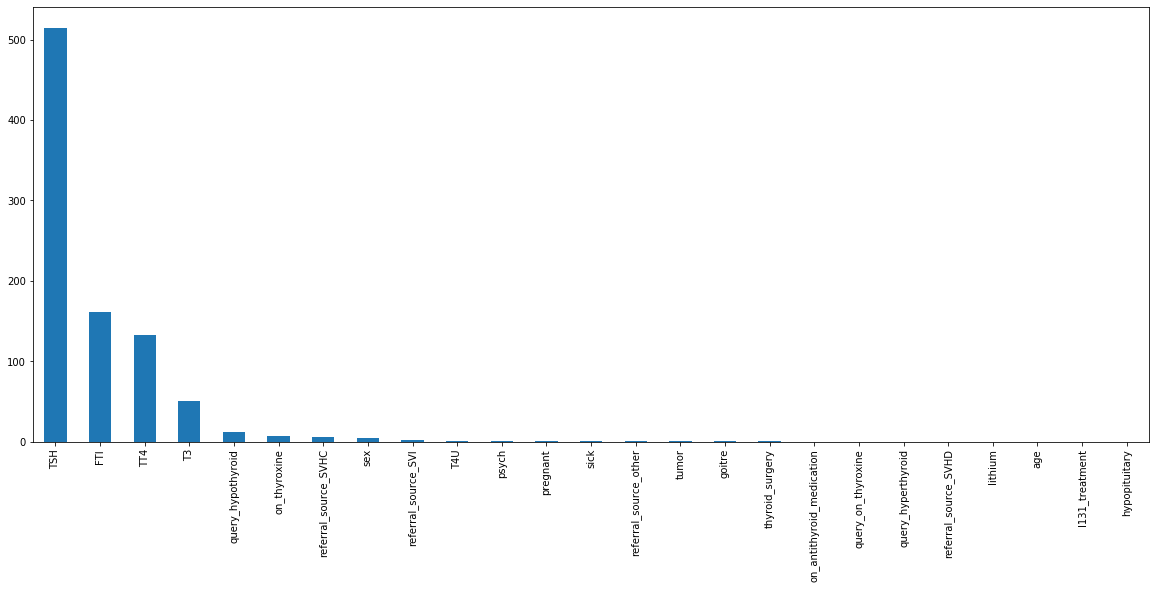

In [96]:
fscore_df['f-score'].sort_values(ascending=False).plot(kind='bar', figsize = (20,8))

#### Observation:

- After performing VIF check, it is evident that referral_source_SVI, referral_source_other, TT4, FTI has VIF score of more than 10. Will have to drop two of the columns: TT4 and referral_source_other.

- Ater performing mutual_info_classi and ANOVA f-test we can see that the label columns is highly realted with TSH, FTI, TT4 and T3 features.

In [97]:
# Dropping 'TT4', 'referral_source_other' cols

X_new = X.drop(columns=['TT4','referral_source_other'])
y_new = dataset['Class']

In [98]:
# Splitting train and test data after dropping two columns

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.25, random_state=None)

In [99]:
# Checking the VIF score again

X_train_scaled = scaler.fit_transform(X_train_new)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_train_scaled

VIF = pd.DataFrame()

VIF["FEATURES"] = X_new.columns
VIF["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]


In [101]:
VIF

,FEATURES,VIF
0,on_thyroxine,1.151231
1,query_on_thyroxine,1.037576
2,on_antithyroid_medication,1.041780
3,sick,1.131089
4,pregnant,1.155896
5,thyroid_surgery,1.009267
6,I131_treatment,1.031457
7,query_hypothyroid,1.031395
8,query_hyperthyroid,1.081471
9,lithium,1.048787


In [102]:
vif

,VIF,FEATURES
0,1.141388,on_thyroxine
1,1.011269,query_on_thyroxine
2,1.032075,on_antithyroid_medication
3,1.139510,sick
4,1.201689,pregnant
5,1.013868,thyroid_surgery
6,1.027114,I131_treatment
7,1.021824,query_hypothyroid
8,1.089927,query_hyperthyroid
9,1.038298,lithium


**Dropped 'TT4' and 'referral_source_other' columns as they have high multicollinearity. On comparison of VIF scores before and after removal of columns, the VIF scores for all columns after removal of 'TT4' and 'referral_source_other' are below 2.**

# HANDLE IMBALANCED DATASET

- There are several ways to handle imabalanced dataset. However choosing OverSampling technique as the data would not be lost in that case. 

#### 1. Handling imabalanced dataset on data where the some of the feature columns have been dropped

In [113]:
# Trying with RandomOverSampler where the priority is given to minority class to increase the data points

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Will perform RandomOverSampling only on train data

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_new, y_train_new)
print(f"Count of data before sampling {Counter(y_train_new)}")
print(f"Count of data after sampling {Counter(y_res)}")

Count of data before sampling Counter({1: 2615, 0: 147, 2: 66})
Count of data after sampling Counter({1: 2615, 2: 2615, 0: 2615})


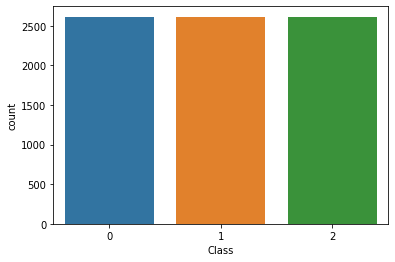

In [114]:
# All the classes are balanced now

sns.countplot(x=y_res)

#### 2. Handling imabalanced dataset on data where the feature columns have not been dropped

In [115]:
ros = RandomOverSampler()
X_sampled, y_sampled = ros.fit_resample(X_train, y_train)
print(f"Count of data before sampling {Counter(y_train)}")
print(f"Count of data after sampling {Counter(y_res)}")

Count of data before sampling Counter({1: 2619, 0: 135, 2: 73, 3: 1})
Count of data after sampling Counter({1: 2615, 2: 2615, 0: 2615})


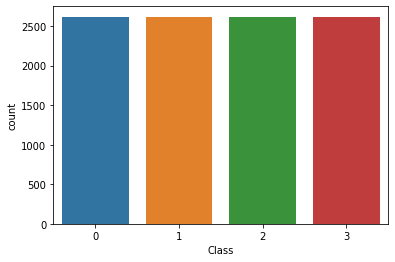

In [116]:
sns.countplot(x=y_sampled)

# MODEL TRAINING

**We will use the following different models**

1. RandomForest Classification 
2. XGBoost
3. KNN
4. Logistic Regression
5. SVM

### 1. RandomForest Classification

#### 1. Using Random Forest Classification on data where the columns with high multicollionearity have not been dropped as it's a  known fact that TT4 plays a big role in indicating thyroid disease.

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [225]:
# Using RandomForestClassifier without hyperparameter tuning on the data where the columns have not been dropped

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

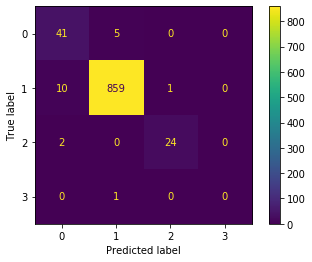

In [226]:
plot_confusion_matrix(rf, X_test, y_test)

In [227]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9798515376458112
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        46
           1       0.99      0.99      0.99       870
           2       0.96      0.92      0.94        26
           3       0.00      0.00      0.00         1

    accuracy                           0.98       943
   macro avg       0.68      0.70      0.69       943
weighted avg       0.98      0.98      0.98       943



In [228]:
# Performing cross_val on the entire dataset to chech the score of 5 cros_val and mean of the scores

print(cross_val_score(rf, X, y, cv=5, scoring='accuracy'))
print(cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean())

[0.96953642 0.97745358 0.98143236 0.98408488 0.98408488]
0.9803787306550493


#### 2. Using Random Forest Classification on data where the columns with high multicollionearity have been dropped

In [229]:
# Using the the data (where those two columns were dropped) to train the model with Random Forest Classifier
# without hyperparameter tuning

ran_f = RandomForestClassifier()
ran_f.fit(X_train_new, y_train_new)
y_pred_new = ran_f.predict(X_test_new)

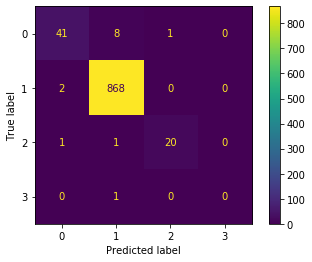

In [230]:
plot_confusion_matrix(ran_f, X_test_new, y_test_new)

In [231]:
print(accuracy_score(y_test_new, y_pred_new))
print(classification_report(y_test_new, y_pred_new))

0.985153764581124
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        50
           1       0.99      1.00      0.99       870
           2       0.95      0.91      0.93        22
           3       0.00      0.00      0.00         1

    accuracy                           0.99       943
   macro avg       0.72      0.68      0.70       943
weighted avg       0.98      0.99      0.98       943



In [232]:
print(cross_val_score(ran_f, X_new, y_new, cv=5, scoring='accuracy'))
print(cross_val_score(ran_f, X_new, y_new, cv=5, scoring='accuracy').mean())

[0.97880795 0.97612732 0.97877984 0.97877984 0.98408488]
0.9787868673915717


### Observation:

- The accuracy score and classification report score suggests that Random Forest can handle multicollinearity hence, the columns need not be dropped as the column TT4 contributes highly to predict the target column.

#### 3. Using Random Forest Classification on data where the columns with high multicollionearity have been dropped and the target feature has been balanaced

In [233]:
# Training the oversampled data with RandomForestClassifier without hyperparameter tuning

rand_for = RandomForestClassifier()
rand_for.fit(X_res, y_res) # Sample data where columns have been dropped
y_pred_sampled = rand_for.predict(X_test_new) # Using the x_test data where columns have been dropped

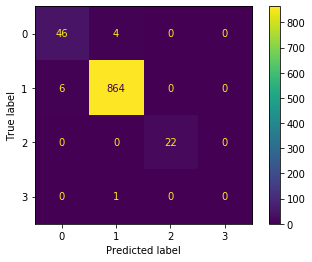

In [234]:
plot_confusion_matrix(rand_for, X_test_new, y_test_new)

In [235]:
print(accuracy_score(y_test_new, y_pred_sampled))
print(classification_report(y_test_new, y_pred_sampled))

0.9883351007423118
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.99      0.99      0.99       870
           2       1.00      1.00      1.00        22
           3       0.00      0.00      0.00         1

    accuracy                           0.99       943
   macro avg       0.72      0.73      0.72       943
weighted avg       0.99      0.99      0.99       943



In [236]:
print(cross_val_score(rand_for, X_new, y_new, cv=5, scoring='accuracy'))
print(cross_val_score(rand_for, X_new, y_new, cv=5, scoring='accuracy').mean())

[0.96953642 0.97877984 0.97745358 0.97745358 0.98541114]
0.9790521193809616


#### 4. Using Random Forest Classification on data where the columns with high multicollionearity have not been dropped and the target feature has been balanaced

In [237]:
# Training the oversampled data with RandomForestClassifier without hyperparameter tuning

clf = RandomForestClassifier()
clf.fit(X_sampled, y_sampled) # Sample data where columns have not been dropped
y_pred_sam = clf.predict(X_test) # Using the x_test data where columns have not been dropped

In [238]:
y_sampled.value_counts()

3    2610
2    2610
1    2610
0    2610
Name: Class, dtype: int64

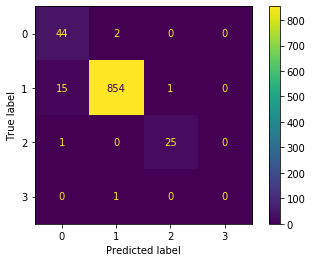

In [239]:
plot_confusion_matrix(clf, X_test, y_test)

In [240]:
print(accuracy_score(y_test, y_pred_sam))
print(classification_report(y_test, y_pred_sam))

0.9787910922587487
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        46
           1       1.00      0.98      0.99       870
           2       0.96      0.96      0.96        26
           3       0.00      0.00      0.00         1

    accuracy                           0.98       943
   macro avg       0.67      0.72      0.70       943
weighted avg       0.98      0.98      0.98       943



In [241]:
print(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))
print(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

[0.97218543 0.97480106 0.9801061  0.97877984 0.98275862]
0.979052822035238


### Observation:

- RandomForest can handle imabalanced dataset as the accuracy score and classification report have not been affected however the data with the balanced dataset shall be used.

- RandomForest can also handle multicollinearity so will choose dataset where the features have not been dropped as TT4 has high relation with the target column.


### 2. Performing Hyperparameter Tuning on model

#### Finally performing Hyperparameter tuning on RandomForest   

In [242]:
param_grid = {
    'n_estimators': [40,55,75,80,100,120],
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(10, 100,8)],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [5,6,7,8,9],
    'max_leaf_nodes': [29,30,32,33],
}


In [243]:
# Uisng StratifiedKFold for cross validation as the data is imabalanced 

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier()

In [244]:
from sklearn.model_selection import RandomizedSearchCV

grid_search=RandomizedSearchCV(estimator=clf, param_distributions=param_grid,n_iter=100, cv=skf, verbose=4)
grid_search.fit(X_sampled, y_sampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=61, max_leaf_nodes=32, min_samples_leaf=8, min_samples_split=6, n_estimators=120;, score=0.992 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=61, max_leaf_nodes=32, min_samples_leaf=8, min_samples_split=6, n_estimators=120;, score=0.990 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=61, max_leaf_nodes=32, min_samples_leaf=8, min_samples_split=6, n_estimators=120;, score=0.990 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=61, max_leaf_nodes=32, min_samples_leaf=8, min_samples_split=6, n_estimators=120;, score=0.993 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=61, max_leaf_nodes=32, min_samples_leaf=8, min_samples_split=6, n_estimators=120;, score=0.989 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=100, max_leaf_nodes=32, min_samples_leaf=9, min_samples_split=7, n_estimators=40;, score=0.992 total time=   0.1s
[CV 2/5] END cri

[CV 5/5] END criterion=gini, max_depth=22, max_leaf_nodes=32, min_samples_leaf=9, min_samples_split=7, n_estimators=80;, score=0.990 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=35, max_leaf_nodes=29, min_samples_leaf=5, min_samples_split=4, n_estimators=55;, score=0.992 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=35, max_leaf_nodes=29, min_samples_leaf=5, min_samples_split=4, n_estimators=55;, score=0.989 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=35, max_leaf_nodes=29, min_samples_leaf=5, min_samples_split=4, n_estimators=55;, score=0.991 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=35, max_leaf_nodes=29, min_samples_leaf=5, min_samples_split=4, n_estimators=55;, score=0.994 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=35, max_leaf_nodes=29, min_samples_leaf=5, min_samples_split=4, n_estimators=55;, score=0.991 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_samples_leaf=8, min

[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.994 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.991 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.992 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.989 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.991 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.993 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, m

[CV 4/5] END criterion=entropy, max_depth=74, max_leaf_nodes=33, min_samples_leaf=8, min_samples_split=3, n_estimators=40;, score=0.994 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=74, max_leaf_nodes=33, min_samples_leaf=8, min_samples_split=3, n_estimators=40;, score=0.990 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=61, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.992 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=61, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.988 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=61, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.990 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=61, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=3, n_estimators=75;, score=0.994 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=61, max_leaf_nodes=29, min_s

[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.993 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_leaf_nodes=33, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.991 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=3, n_estimators=80;, score=0.993 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=3, n_estimators=80;, score=0.990 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=3, n_estimators=80;, score=0.991 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=3, n_estimators=80;, score=0.993 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_s

[CV 4/5] END criterion=gini, max_depth=22, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=4, n_estimators=55;, score=0.993 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=22, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=4, n_estimators=55;, score=0.991 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=100, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=6, n_estimators=75;, score=0.992 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=100, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=6, n_estimators=75;, score=0.990 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=100, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=6, n_estimators=75;, score=0.990 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=100, max_leaf_nodes=29, min_samples_leaf=9, min_samples_split=6, n_estimators=75;, score=0.993 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=100, max_leaf_nodes=29, min_samples_leaf=9, m

[CV 3/5] END criterion=entropy, max_depth=87, max_leaf_nodes=32, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.991 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=87, max_leaf_nodes=32, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.993 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=87, max_leaf_nodes=32, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.991 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=61, max_leaf_nodes=32, min_samples_leaf=9, min_samples_split=2, n_estimators=80;, score=0.992 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=61, max_leaf_nodes=32, min_samples_leaf=9, min_samples_split=2, n_estimators=80;, score=0.989 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=61, max_leaf_nodes=32, min_samples_leaf=9, min_samples_split=2, n_estimators=80;, score=0.990 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=61, max_leaf_nodes=32, mi

[CV 2/5] END criterion=gini, max_depth=87, max_leaf_nodes=33, min_samples_leaf=7, min_samples_split=2, n_estimators=120;, score=0.990 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=87, max_leaf_nodes=33, min_samples_leaf=7, min_samples_split=2, n_estimators=120;, score=0.990 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=87, max_leaf_nodes=33, min_samples_leaf=7, min_samples_split=2, n_estimators=120;, score=0.994 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=87, max_leaf_nodes=33, min_samples_leaf=7, min_samples_split=2, n_estimators=120;, score=0.992 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=74, max_leaf_nodes=32, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.992 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=74, max_leaf_nodes=32, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.990 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=74, max_leaf_nodes=32, min_samples_leaf=7, 

[CV 1/5] END criterion=gini, max_depth=48, max_leaf_nodes=33, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.993 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=48, max_leaf_nodes=33, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.990 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=48, max_leaf_nodes=33, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.991 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=48, max_leaf_nodes=33, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.993 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=48, max_leaf_nodes=33, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.992 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_leaf=5, min_samples_split=7, n_estimators=100;, score=0.993 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=22, max_leaf_nodes=30, min_samples_le

[CV 4/5] END criterion=gini, max_depth=100, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=6, n_estimators=40;, score=0.994 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=100, max_leaf_nodes=30, min_samples_leaf=9, min_samples_split=6, n_estimators=40;, score=0.989 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=7, n_estimators=40;, score=0.993 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=7, n_estimators=40;, score=0.987 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=7, n_estimators=40;, score=0.990 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_samples_leaf=7, min_samples_split=7, n_estimators=40;, score=0.993 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_leaf_nodes=30, min_sampl

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 22, 35, 48, 61, 74,
                                                      87, 100],
                                        'max_leaf_nodes': [29, 30, 32, 33],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [40, 55, 75, 80, 100,
                                                         120]},
                   verbose=4)

In [255]:
# Getting the best parameters

n_estimators = grid_search.best_params_['n_estimators']
min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
max_depth = grid_search.best_params_['max_depth']
criterion = grid_search.best_params_['criterion']
grid_search.best_params_

{'n_estimators': 120,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 32,
 'max_depth': 61,
 'criterion': 'entropy'}

In [256]:
rf_hyperparameter = RandomForestClassifier(n_estimators= n_estimators, min_samples_split= n_estimators, 
                                           min_samples_leaf= min_samples_leaf, max_leaf_nodes= max_leaf_nodes, 
                                           max_depth= max_depth, criterion= criterion)

In [257]:
rf_hyperparameter.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=61, max_leaf_nodes=32,
                       min_samples_leaf=5, min_samples_split=120,
                       n_estimators=120)

In [258]:
y_pred = rf_hyperparameter.predict(X_test)

In [259]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9618239660657476
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        46
           1       0.97      0.99      0.98       870
           2       0.92      0.85      0.88        26
           3       0.00      0.00      0.00         1

    accuracy                           0.96       943
   macro avg       0.67      0.59      0.62       943
weighted avg       0.96      0.96      0.96       943



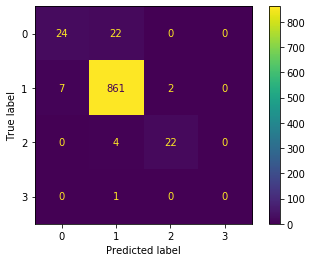

In [260]:
plot_confusion_matrix(rf_hyperparameter, X_test, y_test)

In [261]:
print(cross_val_score(rf_hyperparameter, X, y, cv=5, scoring='accuracy'))
print(cross_val_score(rf_hyperparameter, X, y, cv=5, scoring='accuracy').mean())

[0.95629139 0.9602122  0.95490716 0.9668435  0.96419098]
0.9599581920705464


#### Performing Hyyperparameter Tuning on XGBoost

In [108]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [111]:
param_distributions={
         "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
         "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
         "min_child_weight" : [ 1, 3, 5, 7 ],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [117]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(xgb, param_distributions=param_distributions, scoring='roc_auc', cv=5, verbose =3)
random_search.fit(X_sampled, y_sampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=nan total time=   2.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=nan total time=   2.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=nan total time=   2.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=nan total time=   2.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=nan total time=   2.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=nan total time=   2.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=nan total time=   2.5s
[CV 3/5] END colsample_bytree=0.3, gam

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [118]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [119]:
# Getting the best parameters

learning_rate = random_search.best_params_["learning_rate"]
max_depth = random_search.best_params_["max_depth"]
min_child_weight = random_search.best_params_["min_child_weight"]
gamma = random_search.best_params_["gamma"]   
colsample_bytree = random_search.best_params_["colsample_bytree"]
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [123]:
xgb = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, min_child_weight=min_child_weight, gamma=gamma, 
                    colsample_bytree=colsample_bytree)

xgb.fit(X_sampled, y_sampled)

XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5,
              min_child_weight=7, objective='multi:softprob')

In [124]:
y_pred = xgb.predict(X_test)

In [128]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.968186638388123
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        59
           1       1.00      0.97      0.98       861
           2       0.81      0.95      0.88        22
           3       0.00      0.00      0.00         1

    accuracy                           0.97       943
   macro avg       0.63      0.73      0.67       943
weighted avg       0.98      0.97      0.97       943



### Buidling different models on balanced data:

1. RandomForest Classification 
2. XGBoost
3. KNN
4. Logistic Regression
5. SVC

In [262]:
# Importing all the model to be used:

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [263]:
models = {   
    RandomForestClassifier(): "Random Forest",
    RandomForestClassifier(n_estimators= n_estimators, min_samples_split= n_estimators, min_samples_leaf= min_samples_leaf, max_leaf_nodes= max_leaf_nodes, max_depth= max_depth, criterion= criterion): "Random Forest Hyperparameter Tuned",
    XGBClassifier(): "XGBoost",
    KNeighborsClassifier(): "KNN",
    LogisticRegression(): "Logistic Regression",
    SVC():"Support Vector Machine",
    
}


for clf in models.keys():
    clf.fit(X_sampled, y_sampled)
for model, name in models.items():
    #Rounding off the score to 4 decimal points
     print(f"Accuracy Score for {name} is : {np.round(model.score(X_test, y_test)*100, 4)}%") 

Accuracy Score for Random Forest is : 97.9852%
Accuracy Score for Random Forest Hyperparameter Tuned is : 95.9703%
Accuracy Score for XGBoost is : 97.2428%
Accuracy Score for KNN is : 93.9555%
Accuracy Score for Logistic Regression is : 92.895%
Accuracy Score for Support Vector Machine is : 91.7285%


### Obervation:

- From the above, the conclusion is that the Ensemble algorithms are working better with the dataset as it can handle Outliers and multicollinearity. Also, the data has not been scaled which is why it does not work well with distance-based or parametric algorithms.

- We will be using the two algorithms XGBoost and RandomForest to train the model

### Classification Report for every model

- Checking classfication report for every algorithm

In [264]:
# Printing classification report for all the models

for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Random Forest
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        46
           1       1.00      0.98      0.99       870
           2       0.96      0.96      0.96        26
           3       0.00      0.00      0.00         1

    accuracy                           0.98       943
   macro avg       0.68      0.73      0.70       943
weighted avg       0.98      0.98      0.98       943

----------------------------------------------------------
Classification Report for Random Forest Hyperparameter Tuned
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        46
           1       1.00      0.96      0.98       870
           2       0.89      0.96      0.93        26
           3       0.00      0.00      0.00         1

    accuracy   

#### Observation:

- Since this is a health related issue, the emphasis will be laid more on recall score as the model should predict  least FN. RandomForest and XGBoost both are performing the best with respect to recall and f1-score.

### Cross_validating precision and recall score using Random Forest Model.

In [265]:
rf_hyperparameter = RandomForestClassifier(n_estimators= n_estimators, min_samples_split= n_estimators, 
                                           min_samples_leaf= min_samples_leaf, max_leaf_nodes= max_leaf_nodes, 
                                           max_depth= max_depth, criterion= criterion)

In [266]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(rf_hyperparameter, X, y, scoring=scoring, return_train_score=True)

In [267]:
# Performed 5 fold cross-val and calculating the mean score of recall and precision 

for i,j in scores.items():
    print(i, j.mean())

fit_time 0.15773696899414064
score_time 0.010460710525512696
test_precision_macro 0.8156672880966045
train_precision_macro 0.7048964512160552
test_recall_macro 0.7033303860890067
train_recall_macro 0.6171337407811048


In [268]:
# Cross validating precision and recall score on RandomForest which has not been hypertuned

from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X, y, scoring=scoring, return_train_score=True)
scores

{'fit_time': array([0.13026381, 0.09803796, 0.09966207, 0.10134387, 0.09693313]),
 'score_time': array([0.03137207, 0.030756  , 0.03040099, 0.03080821, 0.03076077]),
 'test_precision_macro': array([0.71878665, 0.62255944, 0.60512647, 0.94674698, 0.46840796]),
 'train_precision_macro': array([0.46269646, 0.55163342, 0.71636245, 0.71511291, 0.61293125]),
 'test_recall_macro': array([0.44062078, 0.56044565, 0.57798951, 0.6391681 , 0.43313294]),
 'train_recall_macro': array([0.44682963, 0.43495157, 0.45023503, 0.43875371, 0.45154752])}

In [269]:
# Performed 5 fold cross-val and calculating the mean score of recall and precision 

for i,j in scores.items():
    print(i, j.mean())

fit_time 0.10524816513061523
score_time 0.03081960678100586
test_precision_macro 0.6723254992901246
train_precision_macro 0.6117472972921563
test_recall_macro 0.5302713985449921
train_recall_macro 0.44446349238695265


### Observation:

- After cross validating, the mean scores of recall and precision are better when the hyperparameters are tuned.

# Saving the final model

In [270]:
import pickle

with open('random_forest.sav', "wb") as f:
    pickle.dump(rf_hyperparameter, f)